# Customer Transaction Prediction
## Can you identify who will make a transaction?

__Aaron M. Del Giudice__

__Machine learning capstone__

# Capstone Presentation
Unit 3 / Lesson 7 / Project 1

You're ready to put into practice everything you've learned so far.

### First: Go out and find a dataset of interest.
It could be from one of our recommended resources, some other aggregation, or scraped yourself.
Just make sure it has lots of variables in it, including an outcome of interest to you.

### Second: Explore the data.
Get to know the data.
Spend a lot of time going over its quirks and peccadilloes.
You should understand how it was gathered, what's in it, and what the variables look like.

### Third: Model your outcome of interest.
You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer.
Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model.

Be sure to cover a few specific things:
- A specified research question your model addresses
- How you chose your model specification and what alternatives you compared it to
- The practical uses of your model for an audience of interest
- Any weak points or shortcomings of your model

This presentation is not a drill.
You'll be presenting this slide deck live to a group as the culmination of your work in the last two supervised learning units.
As a secondary matter, your slides and / or the Jupyter notebook you use or adapt them into should be worthy of inclusion as examples of your work product when applying to jobs.

## Context
The data is provided by Banco Santander as part of a [Kaggle competition](https://www.kaggle.com/c/santander-customer-transaction-prediction) to develop a binary classification model.

The model will identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.
The data provided has the same structure as the real data available to Santander to solve this problem.

The model (and competition submissions) will be evaluated by the area under the ROC curve.

## Success Metric

The measures  used  to evaluate the model: ROC AUC, F1 score, and Average Precision

The ROC curve displays the diagnostic ability of a binary classifier.
It plots the False Positive Rate (FPR)  versus the True Positive Rate (TPR) for a range of threshold values between 0.0 and 1.0.
With it we can visually compare the false alarm rate versus the hit rate.

The true positive rate  is how good the model is at predicting the positive class when the actual outcome is positive

The false positive rate  summarizes how often a positive class is predicted when the actual outcome is negative.

F1 Score is a measure of a model's accuracy. The F1 score is a computation of the model's precision and recall.

Precision is the ratio of the number of true positives divided by the sum of the true positives and false positives.
It describes how good a model is at predicting the positive class.

Recall is the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is also called sensitivity.

F1 summarizes model skill for a specific probability threshold, while average precision and area under curve summarize the skill of a model across thresholds.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, auc, average_precision_score

# Preprocessing

In [2]:
%%time
# import raw training and test data
PATH_train = (r'assets\santander\train.csv')
PATH_test = (r'assets\santander\test.csv')

train_data = pd.read_csv(PATH_train, index_col=None)
test_data = pd.read_csv(PATH_test, index_col=None)

df_train_raw = pd.DataFrame(train_data)
df_test_raw = pd.DataFrame(test_data)

display(df_train_raw.head())

,Unnamed: 0,target,0,1,2,3,4,5,6,7,...,76,77,78,79,80,81,82,83,84,85
0,0,0,-0.027133,0.142831,-0.111250,0.143562,0.004239,-0.071815,0.337378,0.218159,...,-0.005709,-0.129544,-0.099462,-0.012352,-0.045079,-0.046897,-0.043987,0.064105,-0.013727,-0.128452
1,1,0,0.150981,0.330123,0.089315,-0.192914,-0.170878,-0.151223,0.007596,-0.114647,...,0.040397,-0.153714,0.253848,0.214468,-0.036794,-0.130433,-0.061869,-0.079233,0.044787,-0.055746
2,2,0,0.054292,0.222968,0.016821,0.262956,0.025092,0.004047,0.179983,0.136441,...,-0.010997,0.113560,0.022930,0.047859,0.127231,0.139168,-0.000719,-0.066721,0.103822,0.070443
3,3,0,-0.030226,-0.150338,0.325219,-0.326716,-0.101473,0.108594,-0.067955,-0.268760,...,-0.134556,0.025619,-0.177989,-0.049176,0.234301,-0.127792,0.001177,-0.036717,0.151785,-0.106692
4,4,0,0.015250,-0.142634,-0.316099,0.323023,0.001129,0.059206,-0.077948,0.238951,...,0.192886,-0.106981,-0.200711,0.092928,0.127197,-0.018342,-0.071950,-0.000997,0.005745,-0.377629


Wall time: 5min 15s


### EDA

In [3]:
display(df_train_raw.shape)
display(df_test_raw.shape)

(359804, 88)

(200000, 87)

In [4]:
display(df_train_raw.info())
display(df_test_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


None

In [5]:
df_train_raw.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [6]:
# drop ID_code feature
df_train_raw = df_train_raw.drop('ID_code', axis=1)
df_test_raw = df_test_raw.drop('ID_code', axis=1)

In [7]:
# view data types
df_train_raw.columns.to_series().groupby(df_train_raw.dtypes).groups

{dtype('int64'): Index(['target'], dtype='object'),
 dtype('float64'): Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
        'var_8', 'var_9',
        ...
        'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
        'var_196', 'var_197', 'var_198', 'var_199'],
       dtype='object', length=200)}

In [8]:
# view sum of NaN values
df_train_raw.isna().sum().sum()

0

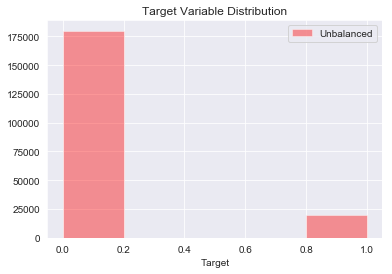

In [27]:
plt.figure(figsize=(6,4))
plt.title("Target Variable Distribution")
sns.distplot(df_train_raw['target'],
             color="red", kde=False,bins=5, label='Unbalanced')
plt.legend()
plt.xlabel('Target')
#plt.savefig('assets\ml_cap_target_unbal.png')
plt.show()

In [10]:
#
features = df_train_raw.drop('target', axis=1).columns.values

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


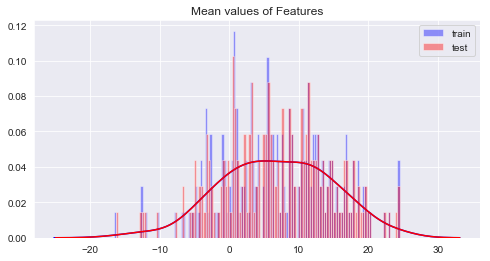

In [11]:
plt.figure(figsize=(8,4))
plt.title("Mean values of Features")
sns.distplot(df_train_raw[features].mean(axis=0),
             color="blue",kde=True,bins=120, label='train')
sns.distplot(df_test_raw[features].mean(axis=0),
             color="red", kde=True,bins=120, label='test')
plt.legend()
#plt.savefig('assets\ml_cap_feature_dist_mean.png')
plt.show()

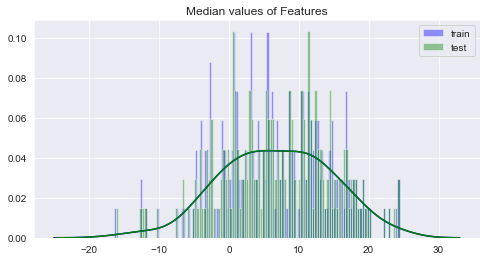

In [12]:
plt.figure(figsize=(8,4))
plt.title("Median values of Features")
sns.distplot(df_train_raw[features].median(axis=0),
             color="blue",kde=True,bins=120, label='train')
sns.distplot(df_test_raw[features].median(axis=0),
             color="green", kde=True,bins=120, label='test')
plt.legend()
#plt.savefig('assets\ml_cap_feature_dist_mid.png')
plt.show()

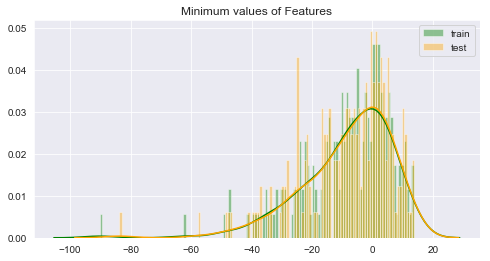

In [13]:
plt.figure(figsize=(8,4))
plt.title("Minimum values of Features")
sns.distplot(df_train_raw[features].min(axis=0),color="green",
             kde=True,bins=120, label='train')
sns.distplot(df_test_raw[features].min(axis=0),color="orange",
             kde=True,bins=120, label='test')
plt.legend()
#plt.savefig('assets\ml_cap_feature_dist_min.png')
plt.show()

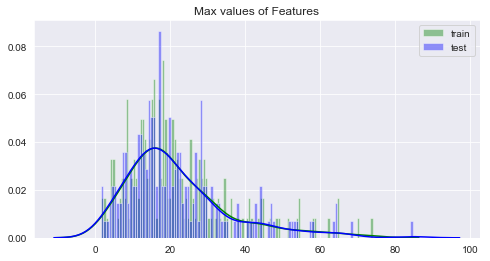

In [14]:
plt.figure(figsize=(8,4))
plt.title("Max values of Features")
sns.distplot(df_train_raw[features].max(axis=0),
             color="green",kde=True,bins=120, label='train')
sns.distplot(df_test_raw[features].max(axis=0),
             color="blue", kde=True,bins=120, label='test')
plt.legend()
#plt.savefig('assets\ml_cap_feature_dist_max.png')
plt.show()

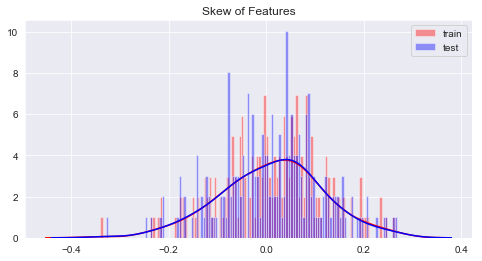

In [15]:
plt.figure(figsize=(8,4))
plt.title("Skew of Features")
sns.distplot(df_train_raw[features].skew(axis=0),
             color="red",kde=True,bins=120, label='train')
sns.distplot(df_test_raw[features].skew(axis=0),
             color="blue", kde=True,bins=120, label='test')
plt.legend()
#plt.savefig('assets\ml_cap_feature_dist_skew.png')
plt.show()

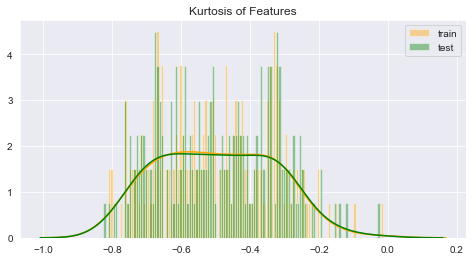

In [16]:
plt.figure(figsize=(8,4))
plt.title("Kurtosis of Features")
sns.distplot(df_train_raw[features].kurtosis(axis=0),
             color="orange",kde=True,bins=120, label='train')
sns.distplot(df_test_raw[features].kurtosis(axis=0),
             color="green", kde=True,bins=120, label='test')
plt.legend()
#plt.savefig('assets\ml_cap_feature_dist_kurtosis.png')
plt.show()

### Train, test, split

In [17]:
#
data = df_train_raw.drop('target', axis=1)
target = df_train_raw['target']
features = [c for c in data.columns]
#
X_train = data
y_train = target
X_test = df_test_raw
y_test = pd.DataFrame()

In [18]:
data.shape

(200000, 200)

### Check for correlation

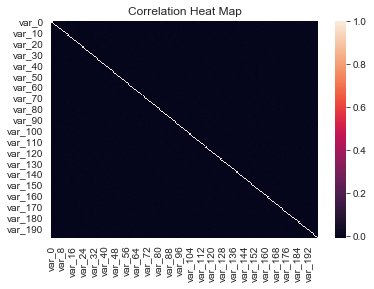

Wall time: 1min 15s
Parser   : 295 ms


In [19]:
%%time

# plot a heatmap
sns.heatmap(data.corr())
plt.title('Correlation Heat Map')
#plt.savefig('assets\ml_cap_corr_mat.png')
plt.show()

In [20]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=4).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

display(data.shape)

# Drop correlated features 
for i in to_drop:
    data = data.drop(i, axis=1)

data.shape

(200000, 200)

(200000, 200)

### T-Test filtering

In [21]:
%%time

#
from scipy.stats import chi2_contingency
#
def ttest_filter(data, target):
    '''
    '''
    feature_list = []
    for feature in data:
        cont = pd.crosstab(data[feature], target)
        chi2_res = chi2_contingency(cont)
        # filter P-value
        if chi2_res[1] <= 0.05:
            feature_list.append(feature)
    return data[feature_list]
            
#
display(X_train.shape)
X_train_filt = ttest_filter(X_train, y_train)
X_test_filt = X_test[X_train_filt.columns.values]
display(X_train_filt.shape)

(200000, 200)

(200000, 99)

Wall time: 2min 53s


### Balance target variable

In [22]:
print('Target variable count:', target.sum())
print('Total observations:', len(target))
print('Target class:', target.sum()/len(target)*100, '%')

Target variable count: 20098
Total observations: 200000
Target class: 10.049 %


In [23]:
%%time
print('Target variable count:', target.sum())
print('Total observations:', len(target))
print('Target class:', target.sum()/len(target)*100, '%')
#
from imblearn import over_sampling as os
sm = os.SMOTE(random_state=42)
features = [c for c in X_train_filt.columns]
X_train_bal, y_train_bal = sm.fit_sample(X_train_filt, y_train.ravel())
X_train_bal = pd.DataFrame(X_train_bal, columns=features)
y_train_bal = pd.DataFrame(y_train_bal)

Target variable count: 20098
Total observations: 200000
Target class: 10.049 %
Wall time: 2min 11s


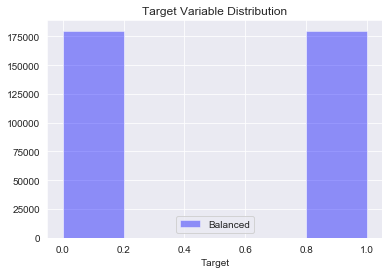

In [26]:
plt.figure(figsize=(6,4))
plt.title("Target Variable Distribution")
sns.distplot(y_train_bal,
             color="blue", kde=False,bins=5, label='Balanced')
plt.legend()
plt.xlabel('Target')
#plt.savefig('assets\ml_cap_target_bal.png')
plt.show()

### Scale data

In [ ]:
%%time

# scale data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
# fit transform X_train
X_train_scaled = scaler.fit_transform(X_train_bal.astype(np.float64))
# transform X_test
X_test_scaled = scaler.transform(X_test_filt)

### PCA

In [ ]:
%%time

# import and apply PCA
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.90)
# fit PCA on training set
X_train_pca = pca.fit_transform(X_train_scaled)
# transform test set
X_test_pca = pca.transform(X_test_scaled)
# convert numpy arrays to dataframe
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
#
features_pca = [c for c in X_train_pca.columns]

In [ ]:
# find components
print(pca.n_components_)

### Store clean data

In [ ]:
%%time

#
X_train = X_train_pca
y_train = y_train_bal.rename(columns={0:'target'})
X_test = X_test_pca
y_test = y_test
features = features_pca

#
df_train_clean = pd.concat([y_train, X_train], axis=1)
df_test_clean = X_test

#
#df_train_clean.to_csv('assets/santander/train_clean.csv', index=True)
#df_test_clean.to_csv('assets/santander/test_clean.csv', index=True)

df_train = df_train_clean
df_test = df_test_clean

In [ ]:
%%time

# to skip data cleaning stage,
# import clean training and test data
PATH_train = (r'assets\santander\train_clean.csv')
PATH_test = (r'assets\santander\test_clean.csv')

train_data = pd.read_csv(PATH_train, index_col=None)
test_data = pd.read_csv(PATH_test, index_col=None)

df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

display(df_train.head())

# Model Selection

In [ ]:
# define confusion matrix function
from sklearn.metrics import confusion_matrix
import itertools

#
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Train, test, split

In [ ]:
#
data = df_train.drop('target', axis=1)
target = df_train['target']
features = [c for c in data.columns]
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
%%time

#
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', random_state=42)
# Train the classifier
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
# metrics
lr_metrics = {}
lr_metrics['Accuracy score'] = accuracy_score(y_test, y_pred)
lr_metrics['Mean absolute error'] = mean_absolute_error(y_test, y_pred)
lr_metrics['Mean squared error'] = mean_squared_error(y_test, y_pred)

### Confusion matrix

In [ ]:
# predict training values
y_pred_train = LR.predict(X_train)
# plot training values
cnf_matrix = confusion_matrix(y_train, y_pred_train)
# display and store metrics
lr_metrics['Train Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the training dataset: {}%".format(lr_metrics['Train Recall metric'])
     )
lr_metrics['Train Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the training dataset: {}%".format(lr_metrics['Train Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Train')
plt.savefig('assets\logistic_conf_train.png')
plt.show()

In [ ]:
# plot test values
cnf_matrix = confusion_matrix(y_test, y_pred)
# display and store metrics
lr_metrics['Test Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the testing dataset: {}%".format(lr_metrics['Test Recall metric'])
     )
lr_metrics['Test Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the testing dataset: {}%".format(lr_metrics['Test Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Test')
plt.savefig('assets\logistic_conf_test.png')
plt.show()

### ROC curve

In [ ]:
# calculate AUC
lr_metrics['ROC-AUC'] = auc_score = roc_auc_score(y_test, y_pred)
print('ROC-AUC: %.3f' % lr_metrics['ROC-AUC'])
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('assets\logistic_ROC.png')
plt.show()

### Precision-recall curve

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
lr_metrics['F1 score'] = f1_score(y_test, y_pred)
# calculate precision-recall AUC
lr_metrics['Precision-Recall AUC'] = auc(recall, precision)
# calculate average precision score
lr_metrics['Average Precision'] = average_precision_score(y_test, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (lr_metrics['F1 score'],
                                    lr_metrics['Precision-Recall AUC'],
                                    lr_metrics['Average Precision']))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('assets\logistic_precision_recall.png')
plt.show()

### Metrics

In [ ]:
# view metrics
print('Logistic Regression')
for i in lr_metrics.items():
    print(i)

## Random Forest

In [ ]:
#
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
# instantiate Random Forest Classifier
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

# metrics
rfc_metrics = {}
rfc_metrics['Accuracy score'] = accuracy_score(y_test, y_pred)
rfc_metrics['Mean absolute error'] = mean_absolute_error(y_test, y_pred)
rfc_metrics['Mean squared error'] = mean_squared_error(y_test, y_pred)

### Confusion matrix

In [ ]:
# predict training values
y_pred_train = RFC.predict(X_train)
# plot training values
cnf_matrix = confusion_matrix(y_train, y_pred_train)
# display and store metrics
rfc_metrics['Train Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the training dataset: {}%".format(rfc_metrics['Train Recall metric'])
     )
rfc_metrics['Train Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the training dataset: {}%".format(rfc_metrics['Train Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Train')
plt.savefig('assets/random_forest_conf_train.png')
plt.show()

In [ ]:
# plot test values
cnf_matrix = confusion_matrix(y_test, y_pred)
# display and store metrics
rfc_metrics['Test Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the testing dataset: {}%".format(rfc_metrics['Test Recall metric'])
     )
rfc_metrics['Test Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the testing dataset: {}%".format(rfc_metrics['Test Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Test')
plt.savefig('assets/random_forest_conf_test.png')
plt.show()

### ROC curve

In [ ]:
# calculate AUC
rfc_metrics['ROC-AUC'] = auc_score = roc_auc_score(y_test, y_pred)
print('ROC-AUC: %.3f' % rfc_metrics['ROC-AUC'])
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('assets/random_forest_ROC.png')
plt.show()

### Precision-recall curve

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
rfc_metrics['F1 score'] = f1_score(y_test, y_pred)
# calculate precision-recall AUC
rfc_metrics['Precision-Recall AUC'] = auc(recall, precision)
# calculate average precision score
rfc_metrics['Average Precision'] = average_precision_score(y_test, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (rfc_metrics['F1 score'],
                                    rfc_metrics['Precision-Recall AUC'],
                                    rfc_metrics['Average Precision']))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('assets/random_forest_precision_recall.png')
plt.show()

### Metrics

In [ ]:
# view metrics
print('Random Forest')
for i in rfc_metrics.items():
    print(i)

## Light Gradient Boosting

In [ ]:
# instantiate Light GBM Classifier
from lightgbm import LGBMClassifier
CLF = LGBMClassifier(random_state=42)
CLF.fit(X_train, y_train)
y_pred = CLF.predict(X_test)
# metrics
lgbm_metrics = {}
lgbm_metrics['Accuracy score'] = accuracy_score(y_test, y_pred)
lgbm_metrics['Mean absolute error'] = mean_absolute_error(y_test, y_pred)
lgbm_metrics['Mean squared error'] = mean_squared_error(y_test, y_pred)

### Confusion matrix

In [ ]:
# predict training values
y_pred_train = CLF.predict(X_train)
# plot training values
cnf_matrix = confusion_matrix(y_train, y_pred_train)
# display and store metrics
lgbm_metrics['Train Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the training dataset: {}%".format(lgbm_metrics['Train Recall metric'])
     )
lgbm_metrics['Train Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the training dataset: {}%".format(lgbm_metrics['Train Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Train')
plt.savefig('assets\light_gbm_conf_train.png')
plt.show()

In [ ]:
# plot test values
cnf_matrix = confusion_matrix(y_test, y_pred)
# display and store metrics
lgbm_metrics['Test Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the testing dataset: {}%".format(lgbm_metrics['Test Recall metric'])
     )
lgbm_metrics['Test Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the testing dataset: {}%".format(lgbm_metrics['Test Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Test')
plt.savefig('assets\light_gbm_conf_test.png')
plt.show()

In [ ]:
### ROC curve

In [ ]:
# calculate AUC
lgbm_metrics['ROC-AUC'] = auc_score = roc_auc_score(y_test, y_pred)
print('ROC-AUC: %.3f' % lgbm_metrics['ROC-AUC'])
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Light GBM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('assets\light_gbm_ROC.png')
plt.show()

In [ ]:
### Precision-recall curve

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
lgbm_metrics['F1 score'] = f1_score(y_test, y_pred)
# calculate precision-recall AUC
lgbm_metrics['Precision-Recall AUC'] = auc(recall, precision)
# calculate average precision score
lgbm_metrics['Average Precision'] = average_precision_score(y_test, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (lgbm_metrics['F1 score'],
                                    lgbm_metrics['Precision-Recall AUC'],
                                    lgbm_metrics['Average Precision']))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Light GBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('assets\light_gbm_precision_recall.png')
plt.show()

In [ ]:
### Metrics

In [ ]:
# view metrics
print('Light GBM')
for i in lgbm_metrics.items():
    print(i)

# Model Tuning
## Hyperparameter Optimization
### Sample dataset
Sample 50% of training data for model optimization.

In [ ]:
# sample training data
from sklearn.model_selection import train_test_split
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42, stratify=y_train)

In [ ]:
#
#feature_fraction=0.05 # select portion of features
#colsample_bytree=feature_fraction
lambda_l1=0
lambda_l2=0
reg_alpha=lambda_l1
reg_lambda=lambda_l2
early_stopping_rounds=3000
valid_sets=[(X_train_sample,y_train_sample)]
eval_names=['valid']
boosting='gbdt'
metric='auc'
objective='binary'
num_threads=4
tree_learner='serial'

fit_params={'lambda_l1':lambda_l1,
            'lambda_l2':lambda_l2,
            #'early_stopping_rounds':early_stopping_rounds,
            #'valid_sets': valid_sets,
            #'eval_names': eval_names,
            'boosting':boosting,
            'metric':metric,
            'objective':objective,
            'num_threads':num_threads,
            'tree_learner':tree_learner
           }
# Initialize model.
#from lightgbm import LGBMClassifier
model = LGBMClassifier(**fit_params, random_state=42)

In [ ]:
%%time
model.fit(X_train_sample, y_train_sample)

In [ ]:
# hard code optimized parameters
best_params = {'verbose': 1,
               'num_leaves': 62,
               'n_estimators': 1000,
               'min_sum_hessian_in_leaf': 1e-05,
               'min_data_in_leaf': 20,
               'max_depth': 11,
               'max_bin': 255,
               'bagging_freq': 0,
               'bagging_fraction': 0.625}

## Final Model

In [ ]:
%%time

# refit model with best parameters
model_best = LGBMClassifier(**best_params, random_state=42)
# Train the classifier 
model_best.fit(X_train, y_train)
# Test the classifier and get the prediction
y_pred = model_best.predict(X_test)
# metrics
model_metrics = {}
model_metrics['Accuracy score'] = accuracy_score(y_test, y_pred)
model_metrics['Mean absolute error'] = mean_absolute_error(y_test, y_pred)
model_metrics['Mean squared error'] = mean_squared_error(y_test, y_pred)

### Confusion matrix

In [ ]:
y_pred_train = model_best.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)

model_metrics['Train Recall metric'] = 100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the train dataset: {}%".format(model_metrics['Train Recall metric'])
     )
model_metrics['Train Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the train dataset: {}%".format(model_metrics['Train Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.savefig('assets\opt_conf_train.png')
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

model_metrics['Test Recall metric'] = 100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the test dataset: {}%".format(model_metrics['Test Recall metric'])
     )
model_metrics['Test Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the test dataset: {}%".format(model_metrics['Test Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.savefig('assets\opt_conf_test.png')
plt.show()

### ROC curve

In [ ]:
# calculate AUC
model_metrics['ROC-AUC'] = auc_score = roc_auc_score(y_test, y_pred)
print('ROC-AUC: %.3f' % model_metrics['ROC-AUC'])
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Optimized Light GBM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('assets\opt_roc.png')
plt.show()

### Precision-Recall curve

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
model_metrics['F1 score'] = f1_score(y_test, y_pred)
# calculate precision-recall AUC
model_metrics['Precision-Recall AUC'] = auc(recall, precision)
# calculate average precision score
model_metrics['Average Precision'] = average_precision_score(y_test, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (model_metrics['F1 score'],
                                    model_metrics['Precision-Recall AUC'],
                                    model_metrics['Average Precision']))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Optimized Light GBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('assets\opt_recall-precision.png')
plt.show()

### Metrics

In [ ]:
# view metrics
print('Optimized Light GBM')
for i in model_metrics.items():
    print(i)

In [ ]:
# Compare performance after optimization
prev_metrics=lgbm_metrics

improv_dict = {}
for i in model_metrics.keys():
    improv_dict[i] = model_metrics[i]-prev_metrics[i]
    
for i in improv_dict.items():
    print(i)

# Analysis
### Train, test, split

In [ ]:
#
data = df_train.drop('target', axis=1)
target = df_train['target']
features = [c for c in data.columns]
#
X_train = data
y_train = target
X_test = df_test
y_test = pd.DataFrame()

## Final Model
### Optimized Light Gradient Boosting

In [ ]:
# hard core optimized model parameters
best_params = {# controls verbosity
               'verbose': 1,
               # Max number of leaves in one tree
               'num_leaves': 62,
               # Number of boosting iterations
               'n_estimators': 1000,
               # Minimal sum hessian in one leaf. Can be used to deal with over-fitting
               # Hessian matrix is a square matrix of second-order partial derivatives
               # of a scalar-valued function.
               # It describes the local curvature of a function of many variables
               'min_sum_hessian_in_leaf': 1e-05,
               # Minimal number of data in one leaf. Can be used to deal with over-fitting
               'min_data_in_leaf': 20,
               # Limit the max depth for tree model. Tree still grows leaf-wise.
               'max_depth': 11,
               # Max number of bins that feature values will be bucketed in.
               # Small number of bins may reduce training accuracy
               # but may increase general power (deal with over-fitting)
               'max_bin': 255,
               # Frequency for bagging. Performs bagging at every k iteration
               'bagging_freq': 0,
               # This will randomly select (subsample) part of data without resampling.
               # Can be used to speed up training and deal with over-fitting
               'bagging_fraction': 0.625
              }

In [ ]:
# instantiate Light GBM Classifier
#from lightgbm import LGBMClassifier
Model = LGBMClassifier(**best_params, random_state=42)
Model.fit(X_train, y_train)
# Test the classifier and get the prediction
y_pred = Model.predict(X_train)
# metrics
model_metrics = {}
model_metrics['Accuracy score'] = accuracy_score(y_train, y_pred)
model_metrics['Mean absolute error'] = mean_absolute_error(y_train, y_pred)
model_metrics['Mean squared error'] = mean_squared_error(y_train, y_pred)

### Confusion matrix

In [ ]:
#y_pred_train = Model.predict(X_train)
#cnf_matrix = confusion_matrix(y_train, y_pred_train)
cnf_matrix = confusion_matrix(y_train, y_pred)

model_metrics['Train Recall metric'] = 100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the train dataset: {}%".format(model_metrics['Train Recall metric'])
     )
model_metrics['Train Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the train dataset: {}%".format(model_metrics['Train Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.savefig('assets\model_conf_train.png')
plt.show()

### ROC curve

In [ ]:
# calculate AUC
model_metrics['ROC-AUC'] = auc_score = roc_auc_score(y_train, y_pred)
print('ROC-AUC: %.3f' % model_metrics['ROC-AUC'])
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Optimized Light GBM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('assets\model_ROC.png')
plt.show()

### Precision-recall curve

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_train, y_pred)
# calculate F1 score
model_metrics['F1 score'] = f1_score(y_train, y_pred)
# calculate precision-recall AUC
model_metrics['Precision-Recall AUC'] = auc(recall, precision)
# calculate average precision score
model_metrics['Average Precision'] = average_precision_score(y_train, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (model_metrics['F1 score'],
                                    model_metrics['Precision-Recall AUC'],
                                    model_metrics['Average Precision']))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Optimized Light GBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('assets\model_precision_recall.png')
plt.show()

### Feature importance

In [ ]:
# view top features
feature_importance = Model.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance[:19])
pos = np.arange(sorted_idx.shape[0]) + 0.5

#plt.subplot(1,2,2)
#plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance[sorted_idx],
            y=pos[::-1],
            orient='h',
            palette="cubehelix",
           )

plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('assets\model_var_import.png')
plt.show()

In [ ]:
# sort top features
top_features = np.where(feature_importance > 57)
top_features = data.columns[top_features].ravel()
print(top_features)

### Metrics

In [ ]:
# view metrics
print('Optimized Light GBM')
for i in model_metrics.items():
    print(i)

## Conclusion
This data set was created to predict which bank customers will make a transaction, which we were able to predict with 97.58% success rate (ROC AUC score).

This model can be applied in a business setting to determine which customers to direct specific services towards. By predicting which customers will make a transaction, businesses can advertise services related to those transactions directly to the customers making them. Businesses could also use this model to more intuitively anticipate the needs of customers by understanding what transactions they will make.

This type of model could be more broadly applied outside the field of financial transactions and be used to predict customer conversion rates in other settings, such as retail, advertising click-through rates, or new customer sign up rates. The model would just require filed-specific features.

Potential shortcomings of this model are the anonymous nature of the features. Both from the unlabeled nature of the data provided and from principal component analysis. The anonymous features can limit feature engineering; without context it’s difficult to determine which factors to manipulate. The lack of labels also prevents meaningful interpretation of the results. After principal component analysis it’s difficult to interpret the model’s top features.  This prevents any possible recommendations or business strategy decisions that could be gained from knowledge of feature efficacy. 

A possible solution to the anonymity of this model could be to use deep learning methods and apply a clustering algorithm for feature engineering. A more advanced approach such as this might create a more meaningful model that could be more versatile in its application.